# Dictionary Learning Tutorial

This is a quick tutorial on building dictionary learning algorithm from ground up.

## Prepare the Data: STL-10 Dataset

The STL-10 image dataset contains images of $96 \times 96$ in size.

In [6]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# setup the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### Define the Data Transforms

In [7]:
transform = transforms.Compose([
    transforms.ToTensor() # converts H x W x C to C x H x W in [0, 1]
])

### Load the Data

In [8]:
dataset = torchvision.datasets.STL10(
    root='./data',
    split='train',
    transform=transform,
    download=True)

dataloader = DataLoader(
    dataset=dataset,
    batch_size=32,
    shuffle=True
)

Files already downloaded and verified


#### Get a Batch

Image batch shape: torch.Size([32, 3, 96, 96])


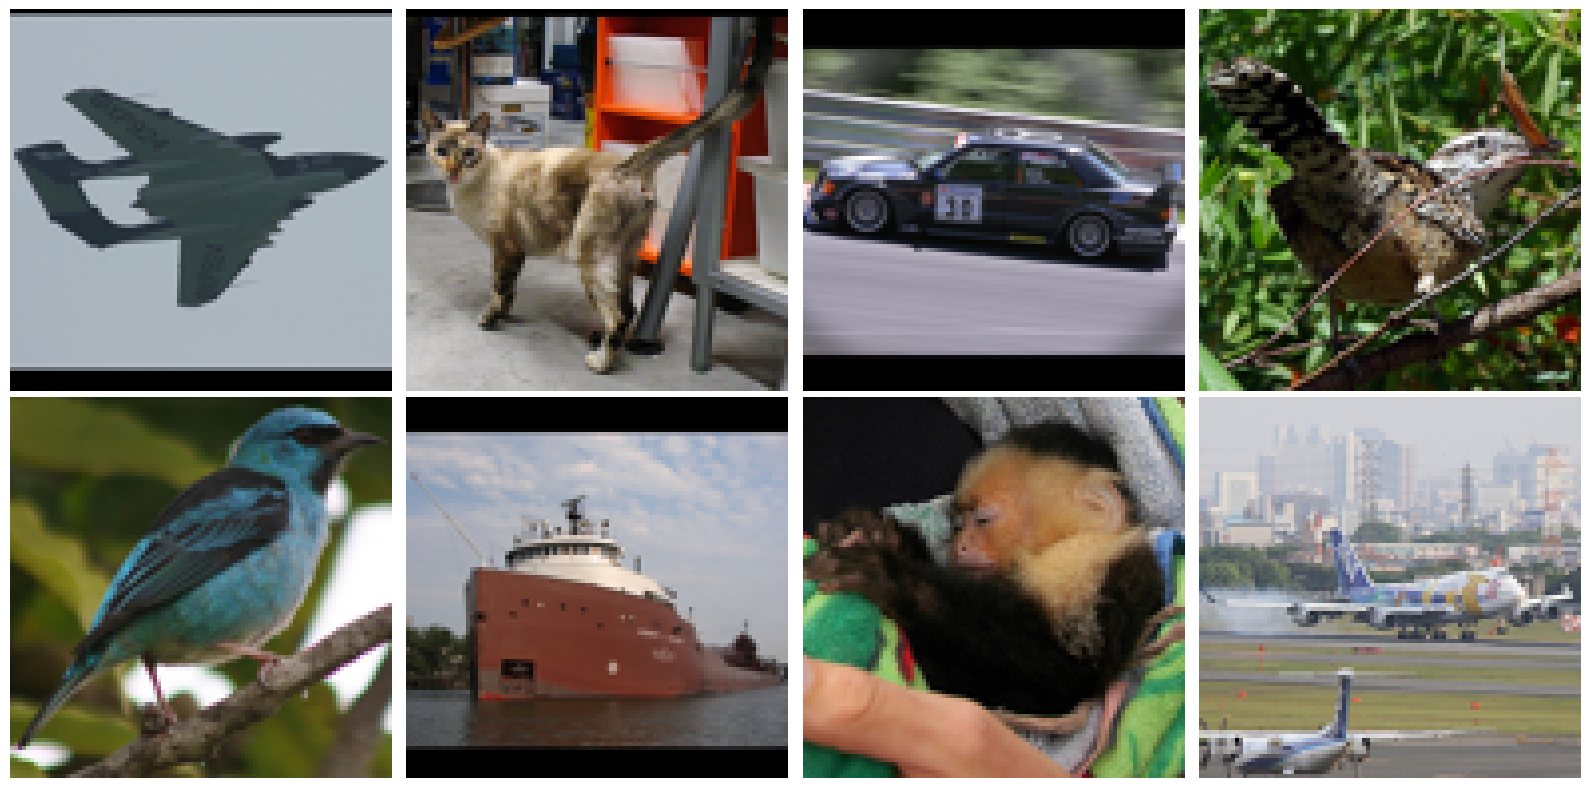

In [11]:
images, _ = next(iter(dataloader))
images = images.to(device) # move to GPU if available

print(f"Image batch shape: {images.shape}") # should be 32 x 3 x 96 x 96

### Visualize the Data
plt.figure(figsize=(16, 8))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i].cpu().permute(1, 2, 0).numpy())
    plt.axis('off')
plt.tight_layout()
plt.show()

## The Algorithm: OMP + K-SVD

The classical dictionary learning goes in two stages,
1. The sparse coding stage: Orthogonal Matching Pursuit
2. The dictionary learning stage: K-SVD